In [79]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
train_data = 'data/train'
test_data = 'data/test'

In [81]:
def one_hot_label(label):
    if label=='1':
        ohl = np.array([1,0])
    elif label == '0':
        ohl = np.array([0,1])
    return ohl 

In [82]:
def train_data_with_labels():
    train_images = []
    for dir in os.listdir('data/train'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/train',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            train_images.append([np.array(img), one_hot_label(label)])
    shuffle(train_images)
    return train_images        

In [83]:
def test_data_with_labels():
    test_images = []
    for dir in os.listdir('data/test'):
        label=str(dir)
        print(label)
        dir = os.path.join(os.getcwd(),os.path.join('data/test',dir))
        for img in os.listdir(dir):
            path = os.path.join(dir,img)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28,28))
            test_images.append([np.array(img), one_hot_label(label)])
    shuffle(test_images)
    return test_images        

In [84]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

In [85]:
training_images = train_data_with_labels()
testing_images = test_data_with_labels()
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,28,28,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tst_img_data = np.array([i[0] for i in testing_images]).reshape(-1,28,28,1)
tst_lbl_data = np.array([i[1] for i in testing_images])

0
1
0
1


In [86]:
model = Sequential()

model.add(InputLayer(input_shape=[28,28,1]))
model.add(Conv2D(filters=32, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=50, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=80, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=100, kernel_size=4, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Conv2D(filters=100, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=5, padding='same', dim_ordering="th"))

model.add(Dropout(0.5))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))
optimizer = Adam(lr=1e-3)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=tr_img_data, y= tr_lbl_data, epochs=70, batch_size=100)

/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=5, padding="same", data_format="channels_first")`
  """
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=5, padding="same", data_format="channels_first")`
  
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=5, padding="same", data_format="channels_first")`
  # This is added back by InteractiveShellApp.init_path()
/home/vishnoitanuj/miniconda3/envs/CV/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=5, padding="same", data_format="channels_first")`
  
/home/vi

Epoch 1/70
478/478 [==============================] - 1s 3ms/step - loss: 2.1265 - acc: 0.5356
Epoch 2/70
478/478 [==============================] - 0s 583us/step - loss: 0.7136 - acc: 0.5586
Epoch 3/70
478/478 [==============================] - 0s 450us/step - loss: 0.5150 - acc: 0.7866
Epoch 4/70
478/478 [==============================] - 0s 428us/step - loss: 0.2522 - acc: 0.9038
Epoch 5/70
478/478 [==============================] - 0s 511us/step - loss: 0.1201 - acc: 0.9498
Epoch 6/70
478/478 [==============================] - 0s 554us/step - loss: 0.0877 - acc: 0.9686
Epoch 7/70
478/478 [==============================] - 0s 579us/step - loss: 0.0790 - acc: 0.9728
Epoch 8/70
478/478 [==============================] - 0s 495us/step - loss: 0.0303 - acc: 0.9916
Epoch 9/70
478/478 [==============================] - 0s 488us/step - loss: 0.0192 - acc: 0.9958
Epoch 10/70
478/478 [==============================] - 0s 498us/step - loss: 0.0166 - acc: 0.9916
Epoch 11/70
478/478 [==========

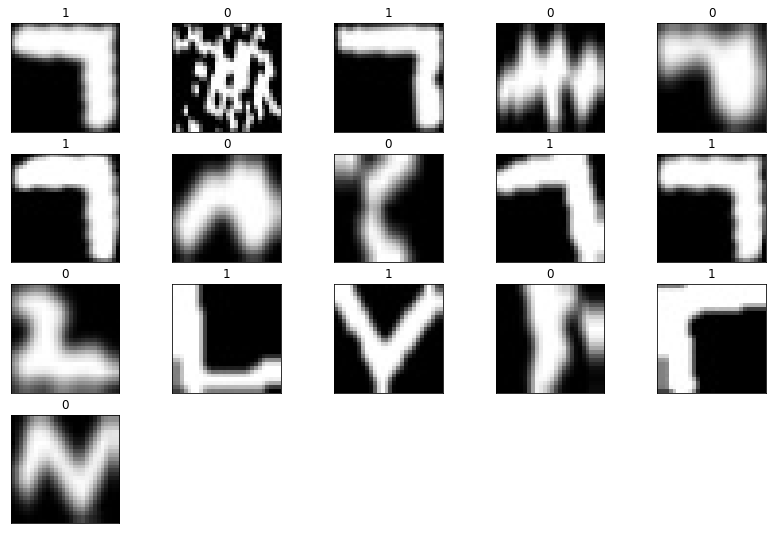

In [87]:
fig = plt.figure(figsize=(14,14))

for cnt, data in enumerate(testing_images[0:]):
    y = fig.add_subplot(6,5, cnt+1)
    img = data[0]
    data = img.reshape(1,28,28,1)
    model_out = model.predict([data])
    
    if np.argmax(model_out)==1:
        str_label = '0'
    else:
        str_label = '1'
        
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)

In [88]:
from image_process import (
    threshold,
    morphology,
    find_contours,
    extra_contour_elimination,
    crop_contour,
    req_contour
)
import csv
import os
import cv2
import numpy as np

In [95]:
dest_dir = 'plot'
def plot(filename,file):
    img = cv2.imread(filename)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    clone = img.copy()
    thresh = threshold(img)
    img, lines = find_contours(thresh)
    final_lines = extra_contour_elimination(lines)
    req = []
    for i,line in enumerate(final_lines):
        L = crop_contour(line,thresh)
        img = cv2.resize(L,(28,28))
        data = img.reshape(1,28,28,1)
        model_out = model.predict([data])

        if np.argmax(model_out)==1:
            str_label = '0'
        else:
            str_label = '1'

        if str_label=='1':
            leftmost = tuple(line[line[:,:,0].argmin()][0])
            rightmost = tuple(line[line[:,:,0].argmax()][0])
            topmost = tuple(line[line[:,:,1].argmin()][0])
            bottommost = tuple(line[line[:,:,1].argmax()][0])
            print(file,leftmost, rightmost,topmost,bottommost)
            req.append(i)
            name = dest_dir+'/'+file
#             print(name)
            

    for index in req:
        rect = cv2.minAreaRect(final_lines[index])
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(clone,[box],0,(0,255,0),4)
        cv2.imwrite(name,clone)


In [96]:
orig_dir = 'CV-Assignment-Dataset'
for file in os.listdir(orig_dir):
    path = os.path.join(orig_dir,file)
    plot(path,file)

DSC08876.JPG (4160, 169) (4168, 171) (4160, 169) (4160, 185)
DJI_0422.JPG (2585, 2242) (2621, 2251) (2611, 2238) (2594, 2275)
DJI_0422.JPG (506, 1612) (527, 1621) (510, 1605) (523, 1622)
DJI_0083.JPG (2439, 2059) (2468, 2079) (2457, 2054) (2463, 2080)
DJI_0083.JPG (2315, 566) (2342, 587) (2324, 564) (2338, 589)
DSC01453.JPG (3109, 1163) (3138, 1180) (3128, 1158) (3133, 1181)
M1_F1.3_0405.JPG (982, 2687) (995, 2688) (983, 2685) (982, 2691)
M1_F1.3_0405.JPG (647, 1493) (681, 1496) (664, 1478) (676, 1498)
DJI_0617.JPG (3775, 30) (3787, 30) (3782, 28) (3777, 40)
DJI_0421.JPG (2333, 1119) (2373, 1112) (2360, 1097) (2349, 1148)
DJI_0036.JPG (1716, 2593) (1757, 2594) (1742, 2583) (1721, 2633)
DJI_0086.JPG (2509, 2438) (2535, 2462) (2522, 2436) (2531, 2462)
DJI_0086.JPG (1515, 1500) (1538, 1498) (1534, 1496) (1521, 1512)
DJI_0086.JPG (2342, 771) (2369, 791) (2349, 769) (2363, 796)
DJI_0086.JPG (2268, 116) (2296, 138) (2287, 113) (2291, 140)
